

# K Nearest Neighbor 

### 1. KNN تئوری

#### 1.1 چه نوع الگوریتمی است؟

KNN برای طبقه بندی استفاده می‌شود. KNN از انواع الگوریتم‌های با نظارت است. این بدین معناست که ما با در دست داشتن تعدادی داده برچسب خورده مانند  $(x,y)$ می‌خواهیم راطه بین  $x$ و $y$ را کشف کنیم. به نحوی دگیر هدف کشف تابع  $h: X\rightarrow Y$ که با دانستن  $x$, $h(x)$  با دقت خوبی$y$ پیشبینی میشود..


#### 1.2 اندازه گیری فاصله

 در مفهوم طبقه‌بندی، الگوریتم KNN تلاش می‌کند تا نزدیک‌ترین k سمپل را به یک نمونه دیده نشده پیدا کند. نزدیکترین و در واقع اندازه در این الگوریتم، اندازه اقلیدسی بین هر نمونه است. 
 اگر  $x_{i}$ یک نمونه با  $p$ eویژگی باشد  $(x_{i1}, x_{i2},..., x_{ip})$, $n$ تعداد کل نمونه‌ها باشد $(i=1,2,...,n)$،  فاصله اقلیدسی بین $x_{i}$ و $x_{l}$ به صورت زیر تعریف می‌شود: 
$$d(x_{i}, x_{l}) = \sqrt{(x_{i1} - x_{l1})^2 + (x_{i2} - x_{l2})^2 + ... + (x_{ip} - x_{lp})^2}$$

بعضی مواقع از روشهای دیگری برای معیار اندازه گیری استفاده می‌شود؛ مانند فاصلی منهتنی، همینگ و ... .

#### 1.3 مراحل الگوریتم

* 1: عدد K را انتخاب کنید.

* 2: با توجه به معیار فاصله الگوریتم، k تا از نزدیک‌ترین‌هارا پیدا کنید.

* 3: گروهی که تعداد بیشتری از این داده‌ها متعلق به آن هستند را به عنوان گروه نمونه جدید اعلام کنید.


### 2. آماده سازی داده

#### 2.1 import کردن کتابخانه‌های مورد نیاز

In [0]:
import numpy as np
import pandas as pd

#### 2.2 بارگذاری مجموعه داده

مجموعه داده Iris شامل سه گونه زنبق با 50 نمونه برای هرگروه می‌باشد. یکی از گونه‌ها به صورت خطی با دوتای دیگر قابل مقایسه است در حالی که دو گونه دیگر تمایز غیرخطی دارند.

In [0]:
# Importing the dataset
dataset = pd.read_csv('./Iris.csv')

NameError: ignored

#### 2.3 مجموعه داده ما چه دارد؟

In [0]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 6)

In [0]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 2.4 تقسیم داده به ویژگی‌ها و برچسب

مجموع داده شامل 6 ستون 


```
'id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm','Species'
```
می‌باشد. ما باید بتوانیم تصمیم بگیریم که کدام ویژگی هستند و کدام هدف.


In [0]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### 2.5 انکد کردن برچسب‌ها


الگوریتم KNN ورودی رشته‌ای قبول نمی‌کند. ما نیاز داریم تا رشته‌ها به یک سری عدد نگاشت شوند. در این مثال، گونه setosa عدد 0 ، گونه versicolor عدد 1 و گونه virginica عدد 2 را دارد.

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#### 2.6 تقسیم بندی داده به دو دسته تست و ترین

حال با تقسیم داده به دو دسته test و train می‌خواهیم بعد از یادگیری بتوانیم روی داده دیده نشده تست انجام بدهیم.

In [1]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ModuleNotFoundError: ignored


در نهایت، چرا که ویژگی‌ها در مقیاس یکی هستند، نیازی به اسکیل کردن ندارند. اگر چه در شرایط دیگر بسیار مهم هست 

### 3. چگونه داده را نشان دهیم؟

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 3.5. نمایش سه بعدی داده

برای داده‌ها با بعدهای بالاتر، می‌نوان از نمایش سه بعدی آن استفاده کرد. همینطور که در نمایش سه بعدی این داده مشخص است، یکی از دو گونه با الگوریتم‌های خطی جدا پذیرند.

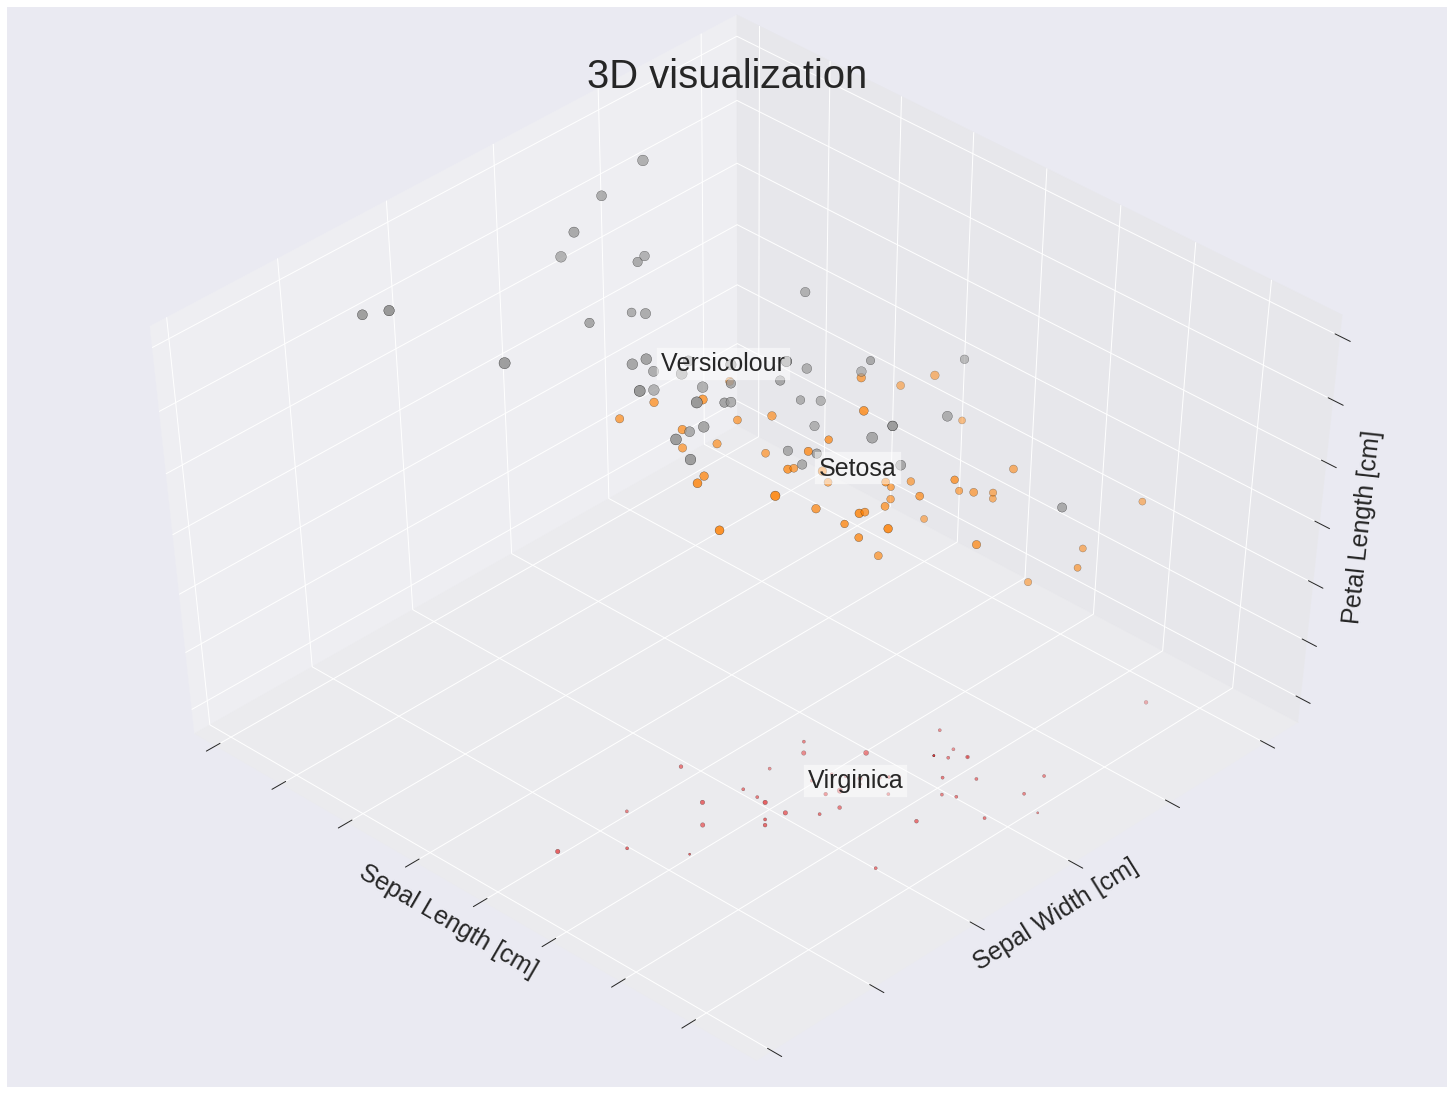

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

### 4. استفاده از KNN برای طبقه‌بندی

#### 4.1. پیش‌بینی

In [0]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### 4.2.ارزیابی پیشبینی



محاسبه دقت مدل

In [0]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


#### 4.3. استفاده از  CrossValidation برای تنظیم پارامترها

In [0]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

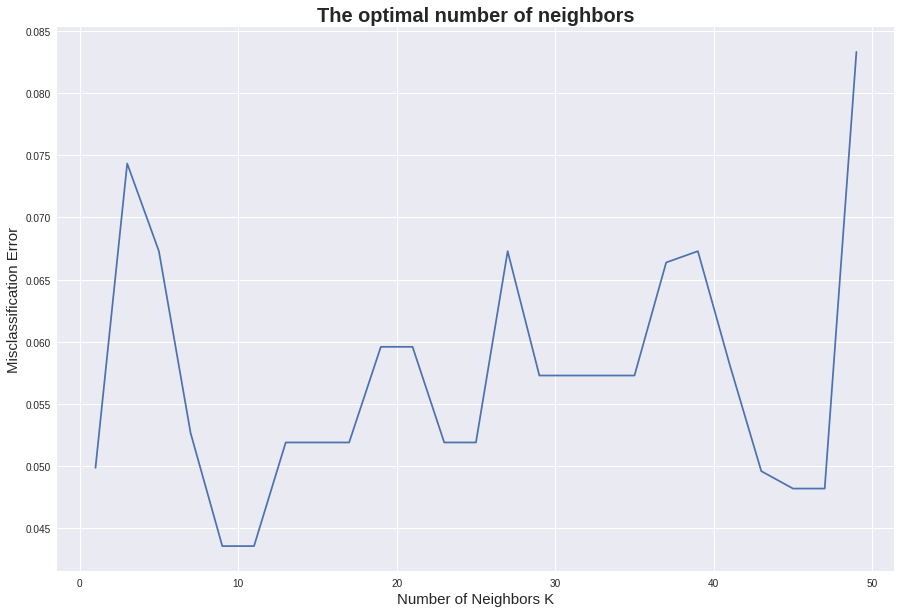

In [0]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [0]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


### 5.پیاده سازی KNN از پایه

In [0]:
import numpy as np
import pandas as pd
import scipy as sp

class MyKNeighborsClassifier():
    """
    My implementation of KNN algorithm.
    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return(predictions)

In [0]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [0]:
# Instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [0]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### 6. منابع

1. MIT Lecture: https://www.youtube.com/watch?v=09mb78oiPkA
2. Iris dataset: https://www.kaggle.com/uciml/iris
3. Theory: http://www.scholarpedia.org/article/K-nearest_neighbor

4. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
5. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
6. https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/